In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
ruta = r"C:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\data"
df1 = pd.read_csv(ruta + r"\bank-additional.csv", index_col=0)
df2 = pd.read_excel(ruta + r"\customer-details.xlsx", index_col=0)

In [67]:
# Renombramos columnas
df2.rename(columns={"ID": "id_"}, inplace=True)

In [68]:
print(df1.columns)
print(df2.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'id_'],
      dtype='object')


In [69]:
#Verificar duplicados en id_
print(f"Duplicados en df1 (bank-additional): {df1['id_'].duplicated().sum()}")
print(f"Duplicados en df2 (customer-details): {df2['id_'].duplicated().sum()}")


Duplicados en df1 (bank-additional): 0
Duplicados en df2 (customer-details): 0


In [70]:
# verificamos nulos
print("Valores nulos en df1 (bank-additional):")
print(df1.isnull().sum())

print("\nValores nulos en df2 (customer-details):")
print(df2.isnull().sum())


Valores nulos en df1 (bank-additional):
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

Valores nulos en df2 (customer-details):
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
id_                  0
dtype: int64


In [71]:
df_merged = df1.merge(df2, on="id_", how="left")
print(df_merged.info())
print(df_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var.rate       43000 non-null  float64       
 14  cons.p

In [72]:
df_merged.isnull().sum()


age                   5120
job                    345
marital                 85
education             1807
default               8981
housing               1026
loan                  1026
contact                  0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m             9256
nr.employed              0
y                        0
date                   248
latitude                 0
longitude                0
id_                      0
Income               22982
Kidhome              22982
Teenhome             22982
Dt_Customer          22982
NumWebVisitsMonth    22982
dtype: int64

In [73]:
print(f"Dimensiones de df1 (bank-additional): {df1.shape}")
print(f"Dimensiones de df2 (customer-details): {df2.shape}")
print(f"Dimensiones de df_merged: {df_merged.shape}")


Dimensiones de df1 (bank-additional): (43000, 23)
Dimensiones de df2 (customer-details): (20115, 6)
Dimensiones de df_merged: (43000, 28)


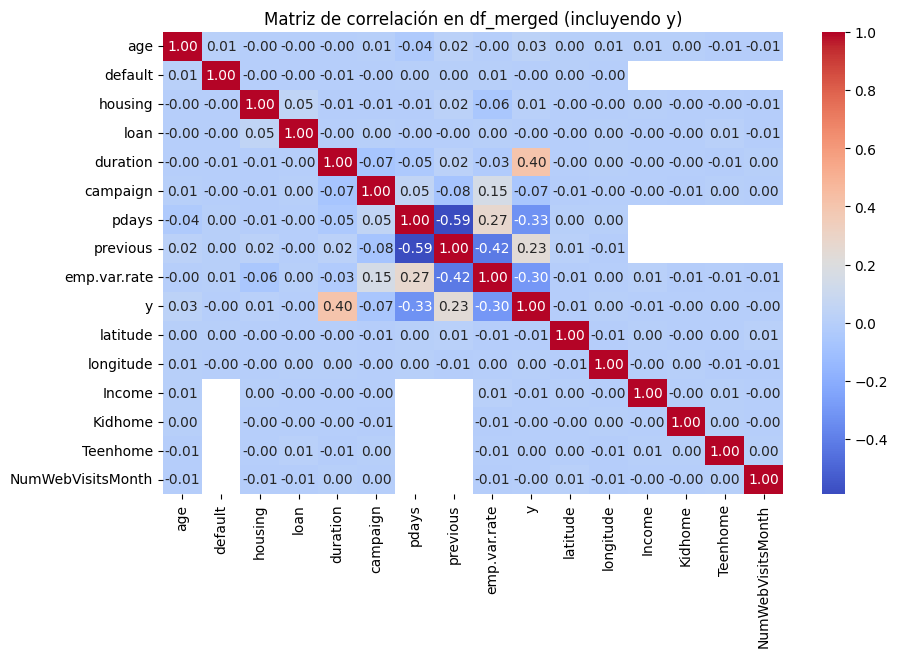

In [74]:
# Convertir 'y' a numérico (0 = no, 1 = yes)
df_merged['y'] = df_merged['y'].map({'no': 0, 'yes': 1}) 

# Filtrar solo columnas numéricas
df_numeric = df_merged.select_dtypes(include=['number'])

# Graficar la matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación en df_merged (incluyendo y)")
plt.show()


In [75]:
# Eliminar columnas de df2 del df_merged
columnas_a_eliminar = ['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth']
df_merged.drop(columns=columnas_a_eliminar, inplace=True)

# Revisar dimensiones finales
print(f"Dimensiones finales de df_merged: {df_merged.shape}")


Dimensiones finales de df_merged: (43000, 23)


In [76]:
print(df_merged.info())
print(df_merged.isnull().sum())
print(df_merged['y'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null 

In [80]:
ruta_guardado = r"C:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\data\df_combinado.csv"


# Guardar en formato CSV sin el índice
df_merged.to_csv(ruta_guardado, index=False, encoding='utf-8')

print(f"✅ Archivo guardado en {ruta_guardado}")




✅ Archivo guardado en C:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\data\df_combinado.csv
